<a href="https://colab.research.google.com/github/Darshan-20310597/PyTorch-GAN/blob/master/First_CNN_CIRFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 20
batch_size = 10 #4
learning_rate = 0.001


The number of iteration per epoch is calculated by number_of_samples / batch_size.
So if you have 1280 samples in your Dataset and set a batch_size=128, your DataLoader will return 10 batches à 128 samples. Therefore the iterations will increase by 10.
As a small side note: the last batch might be smaller if drop_last=False in your DataLoader, if the division returns a remainder.

In [45]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [12]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images


In [13]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

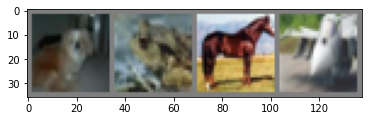

In [14]:
# show images
imshow(torchvision.utils.make_grid(images))

In [34]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # self.conv1 = nn.Conv2d(3, 6, 5)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc1 = nn.Linear(20 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        #x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = x.view(-1, 20 * 5 * 5) 
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

In [35]:
model = ConvNet().to(device)
model


ConvNet(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
print('Finished Training')

Epoch [1/20], Step [2000/12500], Loss: 2.2851
Epoch [1/20], Step [4000/12500], Loss: 2.2604
Epoch [1/20], Step [6000/12500], Loss: 2.3017
Epoch [1/20], Step [8000/12500], Loss: 2.2933
Epoch [1/20], Step [10000/12500], Loss: 2.1849
Epoch [1/20], Step [12000/12500], Loss: 1.8321
Epoch [2/20], Step [2000/12500], Loss: 1.9555
Epoch [2/20], Step [4000/12500], Loss: 1.3819
Epoch [2/20], Step [6000/12500], Loss: 1.6765
Epoch [2/20], Step [8000/12500], Loss: 1.4822
Epoch [2/20], Step [10000/12500], Loss: 1.8260
Epoch [2/20], Step [12000/12500], Loss: 1.7911
Epoch [3/20], Step [2000/12500], Loss: 1.3573
Epoch [3/20], Step [4000/12500], Loss: 1.4993
Epoch [3/20], Step [6000/12500], Loss: 1.3391
Epoch [3/20], Step [8000/12500], Loss: 1.8459
Epoch [3/20], Step [10000/12500], Loss: 1.5832
Epoch [3/20], Step [12000/12500], Loss: 1.6851
Epoch [4/20], Step [2000/12500], Loss: 1.9570
Epoch [4/20], Step [4000/12500], Loss: 0.9320
Epoch [4/20], Step [6000/12500], Loss: 2.0248
Epoch [4/20], Step [8000/125

In [38]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [46]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(20)]
    n_class_samples = [0 for i in range(20)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 65.85 %


In [43]:
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of plane: 68.6 %
Accuracy of car: 69.1 %
Accuracy of bird: 59.5 %
Accuracy of cat: 38.6 %
Accuracy of deer: 61.0 %
Accuracy of dog: 57.7 %
Accuracy of frog: 69.3 %
Accuracy of horse: 69.6 %
Accuracy of ship: 83.4 %
Accuracy of truck: 81.7 %
